 # Project II  Kohonen algorithm (SOM)- Part B 
 ## Author : Daniel Berkovich
 

# Part 1
## A implamentation of SOM algorithm


In [92]:
import numpy as np
import matplotlib.pyplot as plt

class SOM:
    def __init__(self):
        pass

    def euc_dist(self, x, y):
        sum = 0
        for i in range(len(x)):
            sum = sum+pow((x[i]-y[i]),2)
        res = np.sqrt(sum)
        return res
    
    def man_dist(self, n1_x, n1_y, n2_x, n2_y):
        return abs(n1_x - n2_x) + abs(n1_y - n2_y)
    
    def make_node(self, data, t, map):
        row = len(map)
        col = len(map[0])
        vec = data[t]
        min_val = 1.79E+308
        x = 0
        y = 0
        for i in range(row):
            for j in range(col):
                dist = self.euc_dist(vec, map[i][j])
                if dist < min_val:
                    min_val = dist
                    x = i
                    y = j
        return x, y
    

    #Creating the data
    def som(self, data: np.array, max_iter: int, learning_rate: float, row: int, col: int, features: int, show_prog=False, desc="half iter", limit=True):
        if max_iter > len(data):
            print("The data size is smaller then the number of iterations")
            return
        range_max = row+col
        map = np.random.rand(row, col, features)
        for iter in range(max_iter):
            bmu_row, bmu_col = self.make_node(data, iter, map)

            pct_left = 1.0 - ((iter * 1.0) / max_iter)
            curr_range = (int)(pct_left * range_max)
            curr_rate = pct_left * learning_rate

            for i in range(row):
                for j in range(col):
                    if self.man_dist(bmu_row, bmu_col, i, j) < curr_range:
                        map[i][j] = map[i][j] + curr_rate * (data[iter] - map[i][j])

            if show_prog and iter == max_iter//2:
                if limit:
                    plt.gca().set(xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
                plt.title(desc)
                self.plot_map(map, data)
        return map
    
    #Plotting the data 
    def plot_map(self, map, data):
        x = []
        y = []
        for cell in data:
            x.append(cell[0])
            y.append(cell[1])
        plt.scatter(x, y)
        x = []
        y = []
        for row in range(len(map)):
            for col in range(len(map[0])):
                x.append(map[row][col][0])
                y.append(map[row][col][1])
        plt.scatter(x, y,color='red')
        plt.show()

# Part 2
## Plotting the data with SOM, reproduce the experiment on the "monkey hand

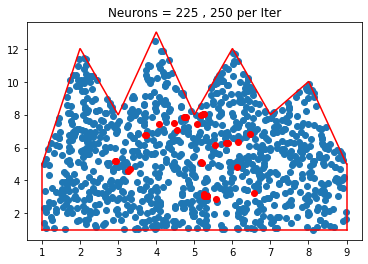

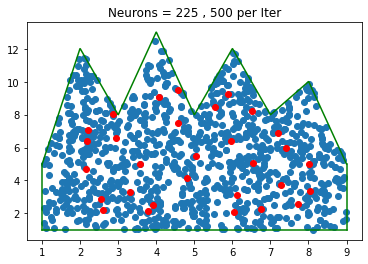

In [95]:
import numpy as np
import matplotlib.pyplot as plt

##Getting the data
def get_data(down, up, size, steps, y_down, y_up, x_left, x_right):
    data = []
    i = 0
    while i < size:
        data_ar = np.array(np.random.uniform(down, up, 2))
        normal_x = (int)(data_ar[0]*steps)-steps
        normal_x = size-1 if normal_x >= size else normal_x
        if x_left[0] <= data_ar[0] <= x_right[0] and y_down[0] <= data_ar[1] <= y_up[normal_x]:
            data.append([data_ar[0], data_ar[1]])
            i += 1
    return data


def full_hand():
    som = SOM()
    
    y_up_x = np.zeros(SIZE)
    x_up_y = np.zeros(SIZE)
    x_left = np.zeros(SIZE)
    x_right = np.zeros(SIZE)
    x = np.linspace(1, 9, SIZE)
    x_up_y = np.ones(SIZE)

    y = np.linspace(1, 5, SIZE)
    x_left = np.ones(SIZE)

    y = np.linspace(1, 5, SIZE)
    x_right = 9 * np.ones(SIZE)

    x = np.linspace(1, 2, STEP)
    y_up_x[0: STEP] = 7 * x - 2

    x = np.linspace(2, 3, STEP)
    y_up_x[STEP: 2 * STEP] = -4 * x + 20

    x = np.linspace(3, 4, STEP)
    y_up_x[2 * STEP: 3 * STEP] = 5 * x - 7

    x = np.linspace(4, 5, STEP)
    y_up_x[3 * STEP: 4 * STEP] = -5 * x + 33

    x = np.linspace(5, 6, STEP)
    y_up_x[4 * STEP: 5 * STEP] = 4 * x - 12

    x = np.linspace(6, 7, STEP)
    y_up_x[5 * STEP: 6 * STEP] = -4 * x + 36

    x = np.linspace(7, 8, STEP)
    y_up_x[6 * STEP: 7 * STEP] = 2 * x - 6

    x = np.linspace(8, 9, SIZE-7*STEP)
    y_up_x[7 * STEP:] = -5 * x + 50

    plt.plot(x_limit, y_up_x, 'r')
    plt.plot(x_limit, x_up_y, 'r')
    plt.plot(x_left, y_limit, 'r')
    plt.plot(x_right, y_limit, 'r')

    data = get_data(1, 13, 1000, STEP, x_up_y, y_up_x, x_left,
                    x_right)

    map = som.som(data, 500, 0.5, 5, 6, 2, show_prog=True, desc="Neurons = 225 , 250 per Iter", limit=False)

    plt.title("Neurons = 225 , 500 per Iter")
    plt.plot(x_limit, y_up_x, 'g')
    plt.plot(x_limit, x_up_y, 'g')
    plt.plot(x_left, y_limit, 'g')
    plt.plot(x_right, y_limit, 'g')
    som.plot_map(map, data)


if __name__ == '__main__':
    min_x = 1
    max_x = 9
    SIZE = 1000
    x_limit = np.linspace(min_x, max_x, SIZE)
    y_limit = np.linspace(min_x, 5, SIZE)
    STEP = 1000 // (max_x - min_x)
    full_hand()


# 2. Cutting off a finger :
## Data points come only from the "hand with 3 fingers" and then continuing from the stopping point in the previous section.

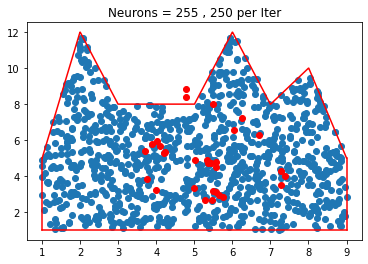

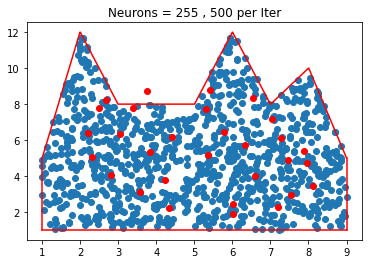

In [98]:
def cut_finger():
    som = SOM()
    y_up_x = np.zeros(SIZE)
    x_up_y = np.zeros(SIZE)
    x_left = np.zeros(SIZE)
    x_right = np.zeros(SIZE)
    x = np.linspace(1, 9, SIZE)
    x_up_y = np.ones(SIZE)
    y = np.linspace(1, 5, SIZE)
    x_left = np.ones(SIZE)
    y = np.linspace(1, 5, SIZE)
    x_right = 9 * np.ones(SIZE)
    x = np.linspace(1, 2, STEP)
    y_up_x[0: STEP] = 7 * x - 2
    x = np.linspace(2, 3, STEP)
    y_up_x[STEP: 2 * STEP] = -4 * x + 20
    x = np.linspace(3, 5, 2*STEP)
    y_up_x[2 * STEP: 4 * STEP] = 8 * np.ones(2 * STEP)
    x = np.linspace(5, 6, STEP)
    y_up_x[4 * STEP: 5 * STEP] = 4 * x - 12
    x = np.linspace(6, 7, STEP)
    y_up_x[5 * STEP: 6 * STEP] = -4 * x + 36
    x = np.linspace(7, 8, STEP)
    y_up_x[6 * STEP: 7 * STEP] = 2 * x - 6
    x = np.linspace(8, 9, SIZE-7*STEP)
    y_up_x[7 * STEP:] = -5 * x + 50

    plt.plot(x_limit, y_up_x, 'r')
    plt.plot(x_limit, x_up_y, 'r')
    plt.plot(x_left, y_limit, 'r')
    plt.plot(x_right, y_limit, 'r')

    data = get_data(1, 13, 1000, STEP, x_up_y, y_up_x, x_left, x_right)

    map = som.som(data, 500, 0.5, 5, 6, 2, show_prog=True, desc="Neurons = 255 , 250 per Iter", limit=False)

    plt.title("Neurons = 255 , 500 per Iter")
    plt.plot(x_limit, y_up_x, 'r')
    plt.plot(x_limit, x_up_y, 'r')
    plt.plot(x_left, y_limit, 'r')
    plt.plot(x_right, y_limit, 'r')
    som.plot_map(map, data)#, x_plots = [x_left, x_right])

    plt.show()
    
    
if __name__ == '__main__':
    min_x = 1
    max_x = 9
    SIZE = 1000
    x_limit = np.linspace(min_x, max_x, SIZE)
    y_limit = np.linspace(min_x, 5, SIZE)
    STEP = 1000 // (max_x - min_x)
    cut_finger()


# Summary and conclusion :
In this part of the project, i used my own Kohonen algorithem, with some look on the SOM package in Matlab for comparing.
In the first part , i made some adjusting to fitting the data to the "monkey hand " to make it closest as i can to get the best results.
I made the algorithem with 255 neurons arranged in a 15 x 15 mesh.
The mesh is superimposed on the plane that contains the hand and we can see after each change over the iterations according to the plots.

In the second part, as requested i "cutted one finger", and the algorithem start running like the previous part.

In conclusion, i had a very unique experience to learn and impelement this kind of experiment and implemting it with SOM.  
